In [87]:
from glob import glob
import matplotlib
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from matplotlib import cm
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle

matplotlib.style.use('ggplot')
%matplotlib inline

In [88]:
Y_class = {'Brush_teeth':0,
            'Climb_stairs': 1,
            'Comb_hair':2, 
            'Descend_stairs':3,
            'Drink_glass':4, 
            'Eat_meat':5,
            'Eat_soup':6,
            'Getup_bed':7,
            'Liedown_bed':8,
            'Pour_water':9,
            'Sitdown_chair':10,
            'Standup_chair':11,
            'Use_telephone':12, 
            'Walk':13
            }

df = []
data = None
def loadDataset():
    global Y_class
    global data
    size = 32
    data = pd.DataFrame()
    for c in Y_class:
        f_list = glob("./HMP_Dataset/" + c + "/*")
        df = pd.DataFrame()
        for f in f_list:
            df_file = pd.read_table(f, sep=' ', header=None)
            for i in range(0, len(df_file) - size, size):
                chunk = df_file.iloc[i:i+32].values.flatten()
                df = df.append([np.append(chunk,Y_class[c])])

        data = data.append(df)
    
loadDataset()


In [89]:
y = data[[96]].values.flatten()
X = data.drop(96, axis=1)


In [90]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=len(Y_class)).fit(X)


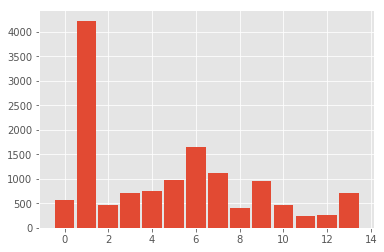

In [91]:
plt.hist(km.labels_, bins=np.arange(len(Y_class) + 1)-0.5,rwidth=0.9, align='mid')
plt.show()

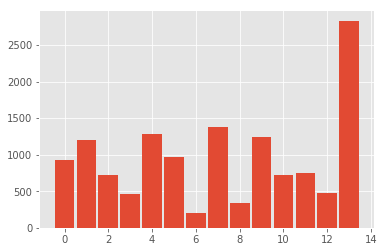

In [92]:
plt.hist(y, bins=np.arange(len(Y_class) + 1)-0.5,rwidth=0.9, align='mid')
plt.show()